# Ford GoBike System Data Exploration

## By Ibrahim Mohamed

## Preliminary Wrangling

> This Notebook explores a dataset containing information about approximately 1.8M individual rides made in a bike-sharing system covering the greater San Francisco Bay area between (1/1/2018) => (31/12/2018).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from datetime import datetime

%matplotlib inline

In [3]:
# Loading the first dataset.
bike_rides = pd.read_csv('201801-fordgobike-tripdata.csv')

# Connect the files together to get the full year data

for i in range(11):
    month = '0' + str(i+2) if i < 8 else str(i+2)
    file = '2018' + month + '-fordgobike-tripdata.csv'
    bike_rides = pd.concat([bike_rides, pd.read_csv(file)], ignore_index=True)

In [4]:
#Checking the number of rows and columns.
bike_rides.shape

(1863721, 14)

In [5]:
#Checking the data types for each column.
bike_rides.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

In [6]:
#Correct the data type for both start and end time.
bike_rides['start_time'] = pd.to_datetime(bike_rides['start_time'])
bike_rides['end_time'] = pd.to_datetime(bike_rides['end_time'])
bike_rides.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
bike_share_for_all_trip            object
dtype: object

In [7]:
# Display the first rows of the dataset.
bike_rides.head(7)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
5,6477,2018-01-31 22:58:44.867,2018-02-01 00:46:41.908,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,No
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,No


In [8]:
# Sorting records according to start_time column
bike_rides.sort_values(by=['start_time'], inplace = True)

In [9]:
#Descriptive statistics for numeric variables.
bike_rides.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


### What is the structure of your dataset?

> There are 1,863,721 records in the dataset, there are 14 features ( duration, start and end station (ids, name, longitude, latitude), start and end time, bike id and user type), most of variables are numeric, there are 4 nominal variables ( start_station_name, end_station_name, bike_share_for_all_trip, and user_type).
>> start_station_name has 313 possible values.
> end_station_name has 313 possible values.
> user_type is either a customer or a subscriber.

### What is/are the main feature(s) of interest in your dataset?

> The most thing I am interested in is to figure out The most likely times that there will be as many bike rides as possible, and the relationship between the user type and the duration of the trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think there is a strong relationship between start_time (the day or the month) and the number of trips.
> I think there is an effect of the type of user on the duration of the trip.
>> I think coordinates will help me getting some relationships between he type of user and distance.

## Univariate Exploration

> I will start by looking at the distribution of the start time.

In [10]:
# Creating a catigorical variable for months.
monNames = {1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun',
                7 : 'Jul', 8 : 'Aug', 9 : 'Seb', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}
def monName(date_):
    return monNames[date_.month]

bike_rides['Month'] = bike_rides.apply(lambda x : monName(x['start_time']), axis = 1)

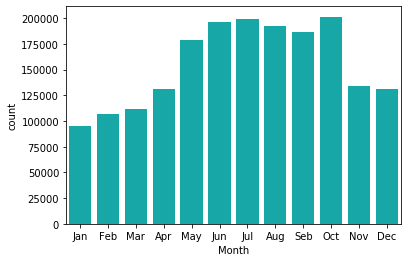

In [11]:
# Start with a bar plot to count the ride trips for each month.
sb.countplot(data = bike_rides, x = 'Month', color = 'c');

> The distribution shows that the best interval is (May => October (Peak)) which suggests that in summer ( Hot weather generally ) the number of bike trips is increasing exponentially.

In [12]:
# Creating a catigorical variable for days.
dayNames = {1 : 'Sat', 2 : 'Sun', 3 : 'Mon', 4 : 'Tue',
                5 : 'Wed', 6 : 'Thu', 0 : 'Fri'}
days_to = {1 : 0, 2 : 31, 3 : 59, 4 : 90, 5 : 120, 6 : 151,
                7 : 181, 8 : 212, 9 : 243, 10 : 273, 11 : 304, 12 : 334}
def dayName(date_):
    return dayNames[(days_to[date_.month] + date_.day + 2) % 7]

bike_rides['Day'] = bike_rides.apply(lambda x : dayName(x['start_time']), axis = 1)

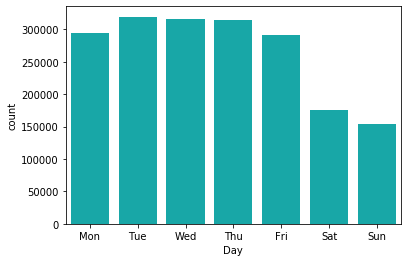

In [13]:
# Plotting a bar plot to see the number of trips per day of the week.
sb.countplot(data = bike_rides, x = 'Day', color = 'c');

> There is a clear difference between the Saturday and Sunday bars and the rest of the week, as there is a clear decrease in them (almost half), which is expected given that they are the weekend.

Now, I will make a bar plot on the user type.

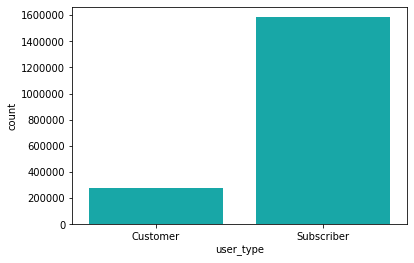

In [14]:
# Now, lets plot a histogram for user type.
sb.countplot(data = bike_rides, x = 'user_type', color = 'c');

> The plot suggests that there is approximately 7 times more chance that the user is a subscriber than is a customer.

Moving to plot duration in seconds in a standard scale.

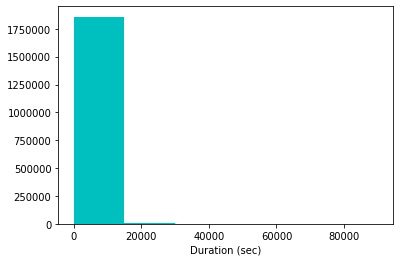

In [15]:
# Plotting duration on a standard scale.
bin_size = 15000
bins = np.arange(0, bike_rides['duration_sec'].max() + bin_size, bin_size)
plt.hist(data = bike_rides, x = 'duration_sec', bins = bins, color = 'c')
plt.xlabel('Duration (sec)');

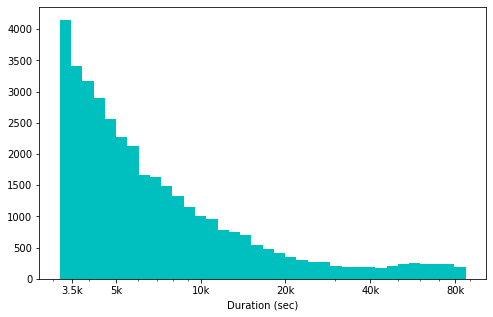

In [16]:
# There's a very long unclear tail in the distribution, so let's put it on a log scale instead.
log_bin_size = 0.04
bins = 10 ** np.arange(3.5, np.log10(bike_rides['duration_sec'].max()) + log_bin_size, log_bin_size)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_rides, x = 'duration_sec', bins = bins, color = 'c')
plt.xscale('log')
plt.xticks([3.5e3, 5e3, 1e4, 2e4, 4e4, 8e4], ['3.5k', '5k', '10k', '20k', '40k', '80k'])
plt.xlabel('Duration (sec)');

> After plotting the duration on a log scale, the duration distribution is extremely right skewed, that means that biking is not the first choice for time consuming trips as for useres.

In [17]:
# Creating a column to calculate minutes out of seconds.
bike_rides['duration_min'] = bike_rides['duration_sec'] // 60

160.0


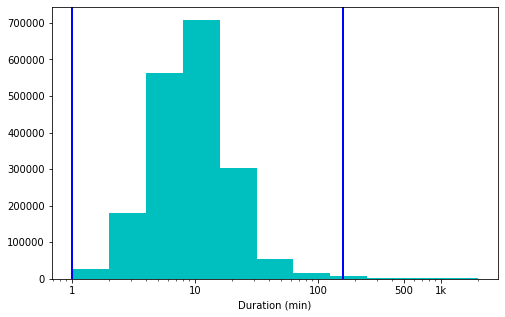

In [18]:
# Plot the duration_min on a standard scale.
log_bin_size = 0.3
bins = 10 ** np.arange(0, np.log10(bike_rides['duration_min'].max()) + log_bin_size, log_bin_size)
upper, lower = np.percentile(bike_rides['duration_min'], 99.5), np.percentile(bike_rides['duration_min'], .5)
print(upper)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_rides, x = 'duration_min', bins = bins, color = 'c')
plt.xscale('log')
plt.xticks([1, 10, 100, 500, 1e3], [1, 10, 100, 500, '1k'])
plt.axvline(x = lower, color = 'blue', linewidth = 2)
plt.axvline(x = upper, color = 'blue', linewidth = 2)
plt.xlabel('Duration (min)');

>The distribution appears normal, and the peak is between (9 to 25 minutes), as well as 99% of users take time from (one to 160 minutes (about two and a half hours)), there are some outliers that reach above 1000 minutes, and the maximum value (1439 Minutes).

Number of users spent 1000+ minutes

In [19]:
bike_rides['duration_min'].max(), bike_rides[bike_rides['duration_min'] > 1000].shape[0]

(1439, 933)

Moving to create a new column for distance and plotting it.

In [20]:
# Creating a distance variable using the coordinates.
def deg2rad(deg):
    return deg * (math.pi/180)

def getDistance(lat1,lon1,lat2,lon2):
    R = 6371
    dLat = deg2rad(lat2-lat1)
    dLon = deg2rad(lon2-lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c * 1000 #Distance in m
    
    return d

bike_rides['distance'] = bike_rides.apply(lambda x: getDistance(x['start_station_latitude'], x['start_station_longitude'],
                                     x['end_station_latitude'], x['end_station_longitude']), axis = 1)

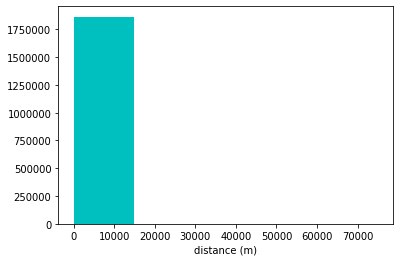

In [22]:
# Creating a plot for distance on a standard scale.
bins = np.arange(0, bike_rides['distance'].max() + bin_size, bin_size)
plt.hist(data = bike_rides, x = 'distance', bins = bins, color = 'c')
plt.xlabel('distance (m)');

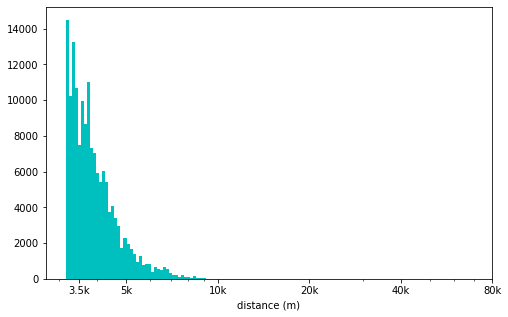

In [23]:
# Has along tail, so again I will use a log scale for distance variable.
log_bin_size = 0.01
bins = 10 ** np.arange(3.5, np.log10(bike_rides['distance'].max()) + log_bin_size, log_bin_size)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_rides, x = 'distance', bins = bins, color = 'c')
plt.xscale('log')
plt.xticks([3.5e3, 5e3, 1e4, 2e4, 4e4, 8e4], ['3.5k', '5k', '10k', '20k', '40k', '80k'])
plt.xlabel('distance (m)');

In [24]:
# It looks like it has a long tail, so I will change the column to calculate distance in kilos instead of meters.
bike_rides['distance'] = bike_rides['distance'] / 1000

5.3775005990007605


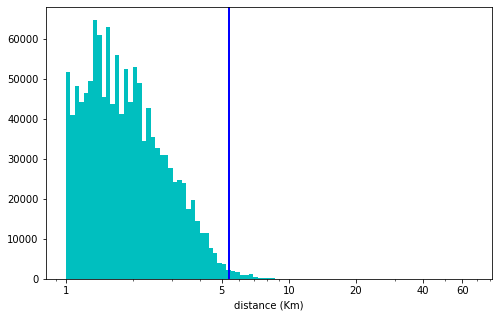

In [25]:
log_bin_size = 0.02
bins = 10 ** np.arange(0, np.log10(bike_rides['distance'].max()) + log_bin_size, log_bin_size)
upper = np.percentile(bike_rides['distance'], 99.5)
print(upper)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_rides, x = 'distance', bins = bins, color = 'c')
plt.xscale('log')
plt.axvline(x = upper, color = 'blue', linewidth = 2)
plt.xticks([1, 5, 10, 20, 40, 60], [1, 5, 10, 20, 40, 60])
plt.xlabel('distance (Km)');

99.5% of users, park their bike in a station less than 6km away from start station.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I used start time variable which can be considered the date for each record, to determine the most frequent times for bike trips:
<br>
- In term of (Months), The mid-year months were the largest bars, we can say that it depends more on the seasons of the year, In warm weather, the numbers increase.
- In term of (Days), days between ( monday - friday ) were the largest bars, we might consider this due to the fact that Saturday and Sunday are the weekend.

> For duration, I created another column for duration but in minutes, then:
<br>
- In term of (Seconds), The distribution on the standard scale had a very long unseen tail that I needed to make a log transformation, which made the distribution sounded right skewed.
- In term of (Minutes), I plot it on a log scale that, it sounded normally distributed, and I concluded that about 99% of users don't spend mor than 160 minutes in their bike trips. Also I founded some outliers ( about 933 users spent more than 1000 minutes in their trips).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For user_type variable, I made a bar plot that gave me that there is almost 7 times more chance that the user is a subscriber than being a customer.
<br>
> I used coordinates variables to creat a new column named (distance) which consider the distance between the start and end stations, and I plot it on a log scale plot, that I concluded that 99.5% of users, park their bike in a station less than 6km away from start station.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [262]:
numeric_vars = ['duration_sec', 'start_station_latitude', 'start_station_longitude',
                'end_station_latitude', 'end_station_longitude', 'distance']
categoric_vars = ['start_station_name', 'end_station_name', 'user_type']

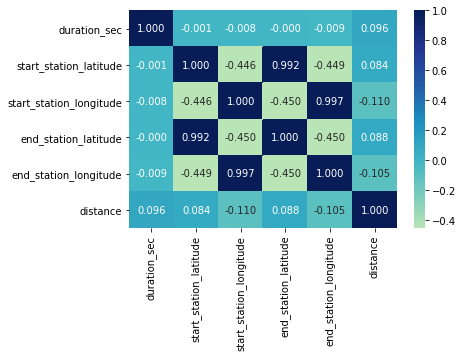

In [263]:
sb.heatmap(bike_rides[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'YlGnBu', center = 0);

In [264]:
# Using plot matrix: sample 1000 rides.
samples = np.random.choice(bike_rides.shape[0], 1000, replace = False)
bike_rides_samp = bike_rides.loc[samples,:]

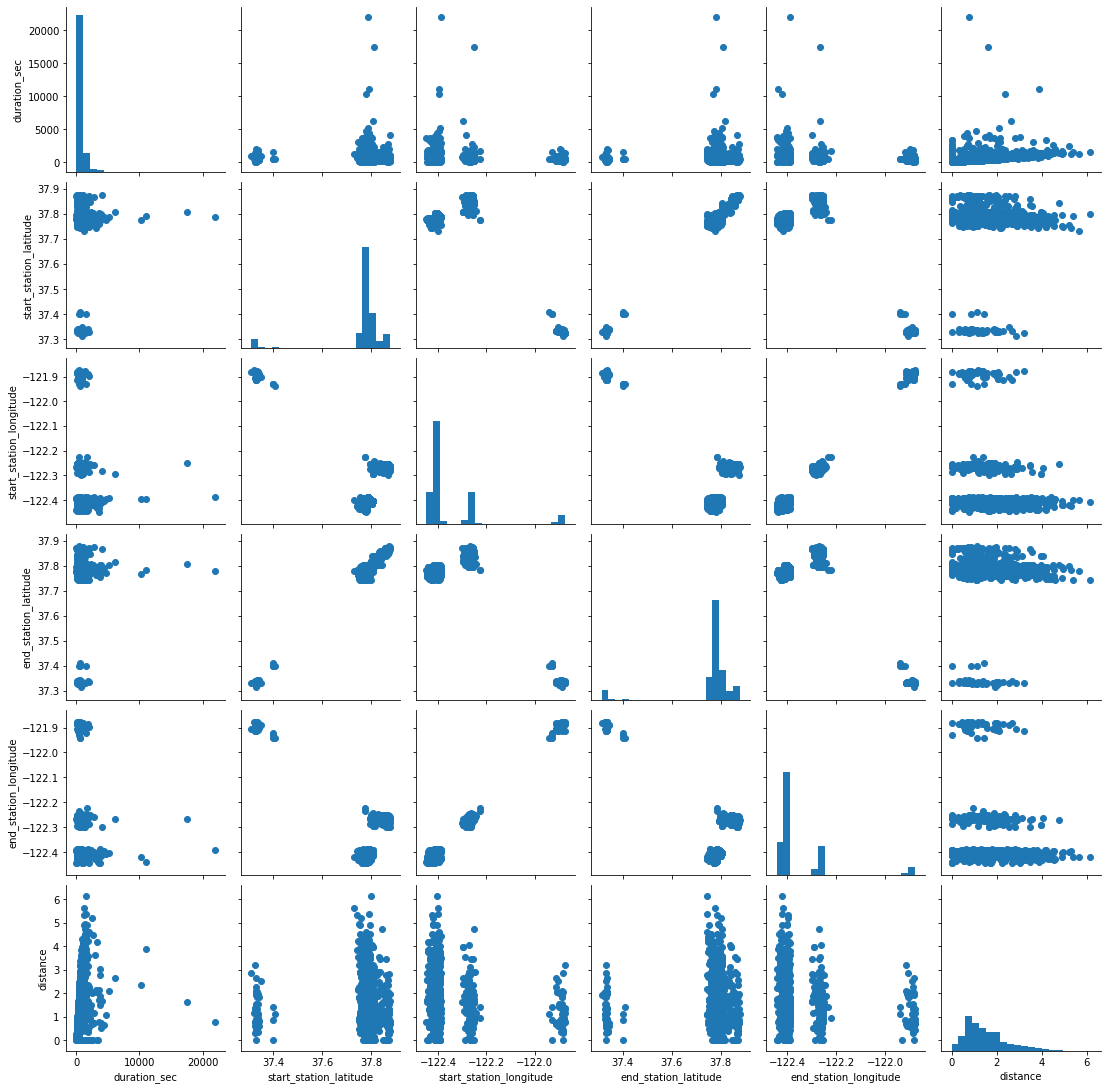

In [265]:
g = sb.PairGrid(data = bike_rides_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

The heat map and the plot matrix show that there is a strong relationship between coordinates, which supports the result I found that Users did not park too far from the starting station (6km maximum).

The strange relationship between duration(sec) and distance, which looks like a constant relationship, It may be because, the people who parked at far stations go directly to the end station, while those who park at the same start station
or a nearby station use time in wandering by bike, or maybe they go to remote places then come back to their homes.

Now, I will move to plot the correlation between user type and duration.

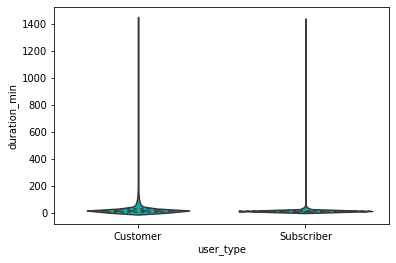

In [266]:
sb.violinplot(data = bike_rides, x = 'user_type',
              y = 'duration_min', color = 'c', inner = 'quartile');

Because of the outliers, this plot is uninterpretable, so I will remove 1% of the data (the outliers that spent more than (160 minutes)).

In [267]:
bike_rides = bike_rides[bike_rides['duration_min'] < 160]

Now, I will move to plot the correlation between user type and duration ( on a log scale).

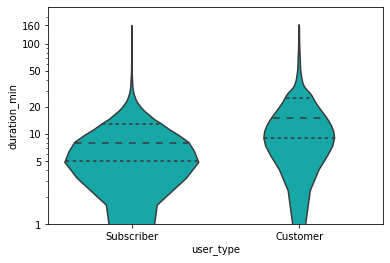

In [268]:
sb.violinplot(data = bike_rides, x = 'user_type',
              y = 'duration_min', color = 'c', inner = 'quartile')
plt.yscale('log')
plt.yticks([1, 5, 10, 20, 50, 100, 160], [1, 5, 10, 20, 50, 100, 160])
plt.ylim(1,);

The viloin plot and the inner quartile suggests that if a user is a customer the duration mean is highr than being a subscriber, that means that in range customers spend more time in their trips.

Lets move to plot the correlation between months and user type.

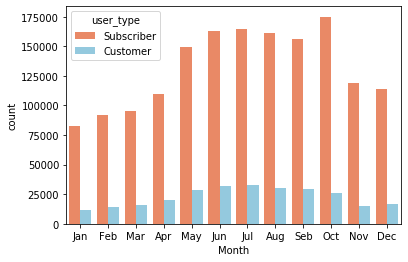

In [269]:
sb.countplot(data = bike_rides, x = 'Month', hue = 'user_type', palette = ['coral', 'skyblue']);

The plot shows that both types follow the same curve except that the peak as for subscribers was in (October) while for customers the peak is the mid of the year ( June - July ).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The strange relationship between duration(sec) and distance, which looks like a constant relationship, It may be because, the people who parked at far stations go directly to the end station, while those who park at the same start station or a nearby station use time in wandering by bike, or maybe they go to remote places then come back to their homes.
<br>
> The relationship between user type and duration(min) says that customers spend more time in their trips on avrage.
<br>
> The relationship between months and user type follow the same trend for both types, that suggest that for both types, summer months are the largest bars ( More bike rides are in summer ).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was a strong relationship between coordinates, which supports the result I found that Users did not park too far from the starting station (6km maximum).

## Multivariate Exploration

> First, I want to see the average minutes for each user type for each month.

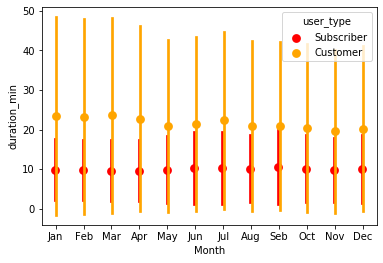

In [270]:
sb.pointplot(data = bike_rides, x = 'Month', y = 'duration_min', hue = 'user_type',
             palette = ['red', 'orange'], ci = 'sd', dodge = True, linestyles = '');

The plot shows that customers over the year spent more minutes (almost double) on average.
<br>
Also, we can see that the average minutes for subscribers is constant over the year while it decreases over the year as for customers.

In [272]:
bike_rides_samp = bike_rides_samp[bike_rides_samp['duration_min'] < 160]

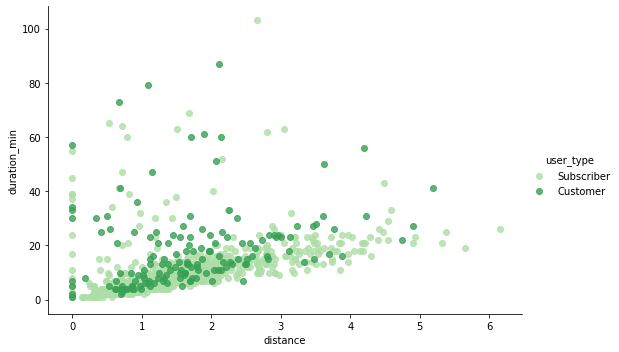

In [275]:
g = sb.FacetGrid(data = bike_rides_samp, hue = 'user_type', size = 5, aspect = 1.5, palette = 'Greens')
g = g.map(sb.regplot, 'distance', 'duration_min', fit_reg = False);
g.add_legend();

From the plot, it appears that most of users _whatever was the type_ follow the same curve ( weak positive relationship between the distance and the duration(m)). However, the ratio of customers spending more than 30 minutes to overall customers is greater than the same ratio as for subscribers. ( This result is just by looking at the plot ).

In [279]:
# Ensure the result from the previous plot.
greater_30 = bike_rides_samp[bike_rides_samp['duration_min'] > 30]
customers_30_ratio = greater_30[greater_30['user_type'] == 'Customer']
Subscribers_30_ratio = greater_30[greater_30['user_type'] == 'Subscriber']
customers_30_ratio = customers_30_ratio.shape[0] / bike_rides_samp[bike_rides_samp['user_type'] == 'Customer'].shape[0]
Subscribers_30_ratio = Subscribers_30_ratio.shape[0] / bike_rides_samp[bike_rides_samp['user_type'] == 'Subscriber'].shape[0]
customers_30_ratio, Subscribers_30_ratio

(0.1346153846153846, 0.030952380952380953)

I will move to plot a comprasion between top 5 stations that recieved subscribers against top 5 stations that recieved customers.

In [315]:
# Grouping by station name.
df = pd.DataFrame(bike_rides.groupby(['start_station_name'])['user_type'].value_counts())
df.rename(columns={'user_type': 'count'}, inplace = True)
df.reset_index(inplace=True)

In [316]:
# Grouping by the type (subscriber).
df2 = df.sort_values(by = ['count'])[df.sort_values(by = ['count'])['user_type'] == 'Subscriber']

In [320]:
# Grouping by the type (Customer).
df3 = df.sort_values(by = ['count'])[df.sort_values(by = ['count'])['user_type'] == 'Customer']

Getting dataframes with only top 5 stations for each user type.

In [339]:
top_sub = list(df2.tail(5)['start_station_name'])
top_sub

['Montgomery St BART Station (Market St at 2nd St)',
 'Berry St at 4th St',
 'Market St at 10th St',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)']

In [344]:
df_top_sub = bike_rides.query('start_station_name in ["Montgomery St BART Station (Market St at 2nd St)","Berry St at 4th St","Market St at 10th St","San Francisco Caltrain (Townsend St at 4th St)", "San Francisco Caltrain Station 2  (Townsend St at 4th St)"]')
df_top_sub.shape[0]

172949

In [345]:
top_cus = list(df3.tail(5)['start_station_name'])
top_cus

['The Embarcadero at Vallejo St',
 'Powell St BART Station (Market St at 5th St)',
 'Powell St BART Station (Market St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'The Embarcadero at Sansome St']

In [346]:
df_top_cus = bike_rides.query('start_station_name in ["The Embarcadero at Vallejo St", "Powell St BART Station (Market St at 5th St)", "Powell St BART Station (Market St at 4th St)", "San Francisco Ferry Building (Harry Bridges Plaza)", "The Embarcadero at Sansome St"]')
df_top_cus.shape[0]

137981

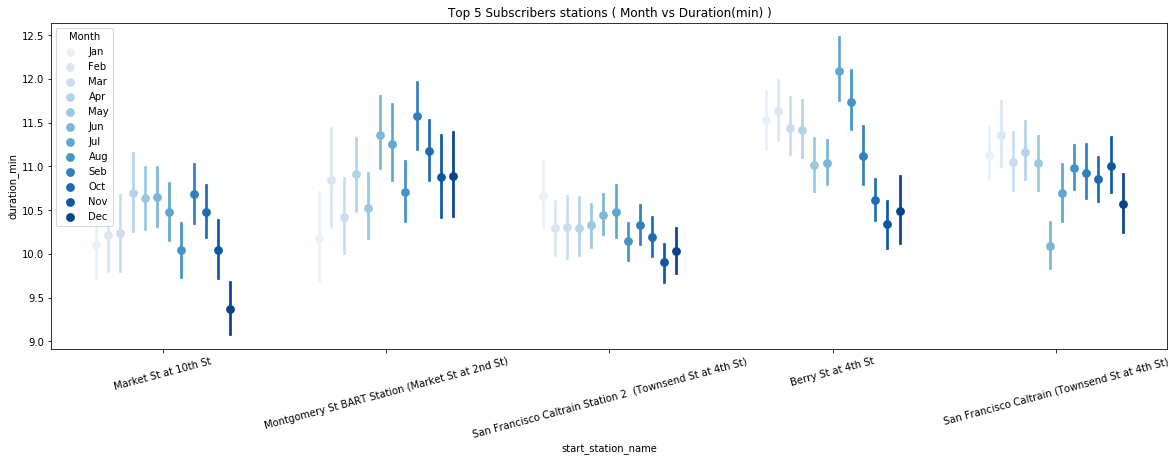

In [361]:
fig, ax = plt.subplots(ncols = 1, figsize = [20,6])

sb.pointplot(data = df_top_sub, x = 'start_station_name', y = 'duration_min', hue = 'Month',
             palette = 'Blues', linestyles = '', dodge = 0.6)
plt.xticks(rotation = 15)
plt.title('Top 5 Subscribers stations ( Month vs Duration(min) )');

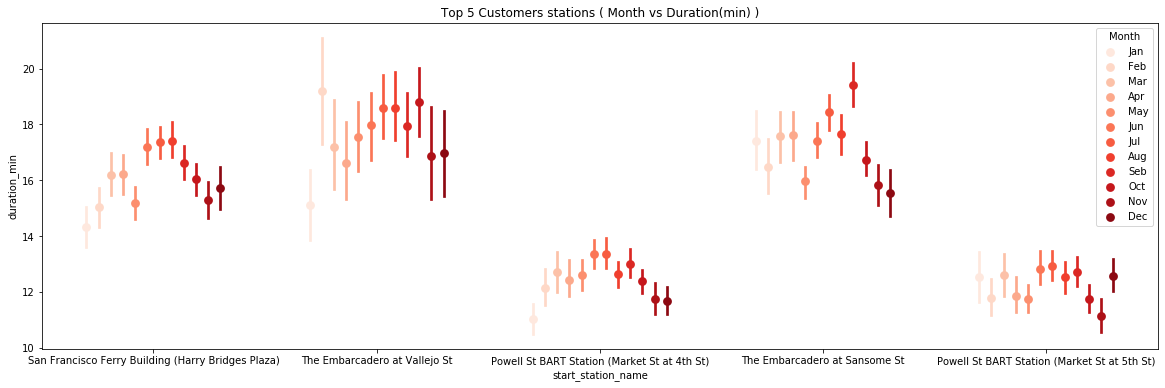

In [362]:
fig, ax = plt.subplots(ncols = 1, figsize = [20,6])
sb.pointplot(data = df_top_cus, x = 'start_station_name', y = 'duration_min', hue = 'Month',
             palette = 'Reds', linestyles = '', dodge = 0.6)
plt.title('Top 5 Customers stations ( Month vs Duration(min) )');

By comparing the two plots, it appeares that top customers stations have more minutes on avrage for each month than subscribers stations ( almost double ).
<br>
For both groups, the change of avrage over the year for each station wasn't regular in most cases, but it tends to increase in customer group, while it tends to decrease over the year in subscriber group.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation to ensure that customers, spent more minutes on avrage in theit trips, I plot the relation ship between months, duration, and user type, I found that for each month customers spent more minutes on average.
<br>
> I continued by plotting a figuer to see the correlation between duration and distance for each user type, and it sounded such that there is no diffrence between the two types as both were following the same curve, but I thought that was because of the little number of customers, so I decided to calculate the ratio (sometype spent > 30 min) to (number of sometype) for both, and I concluded that the ratio of customer is greater.

### Were there any interesting or surprising interactions between features?

> At the end, I made two groups ( top 5 customers stations ) and ( top 5 subscribers stations ), and I used each group to plot a ( duration vs month ) plot for each station in both groups, contrary to the previous conclusion, the average minutes for each mont over year for any station wasn't constant. However, These plot strongly proved the difference in the average of minutes between the two types.